* Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data file

In [2]:
df = pd.read_csv('HousePrices2.csv')

# EDA (Exploratory Data Analysis)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044 entries, 0 to 2043
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   House Area  2044 non-null   int64
 1   Rooms       2044 non-null   int64
 2   floor       2044 non-null   int64
 3   price       2044 non-null   int64
dtypes: int64(4)
memory usage: 64.0 KB


In [4]:
df.shape

(2044, 4)

In [5]:
df.columns

Index(['House Area', 'Rooms', 'floor', 'price'], dtype='object')

In [6]:
df.head(2)

,House Area,Rooms,floor,price
0,225,3,4,902400
1,287,3,3,1149800


In [7]:
df.corr()

,House Area,Rooms,floor,price
House Area,1.000000,0.940285,0.007069,0.999997
Rooms,0.940285,1.000000,-0.008583,0.940413
floor,0.007069,-0.008583,1.000000,0.009513
price,0.999997,0.940413,0.009513,1.000000


* Visualize the data

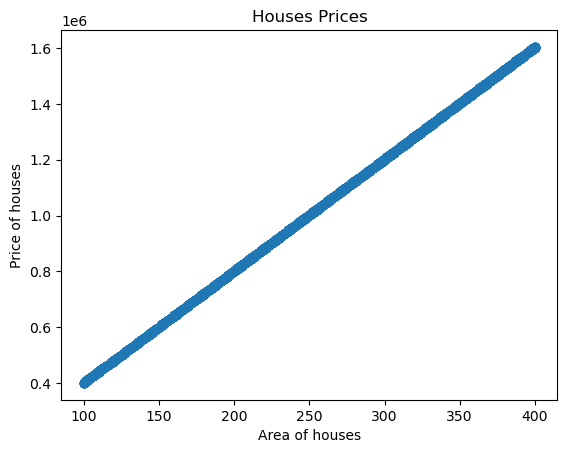

In [8]:
plt.scatter(df['House Area'], df['price'])
plt.xlabel("Area of houses")
plt.ylabel("Price of houses")
plt.title("Houses Prices")
plt.show()

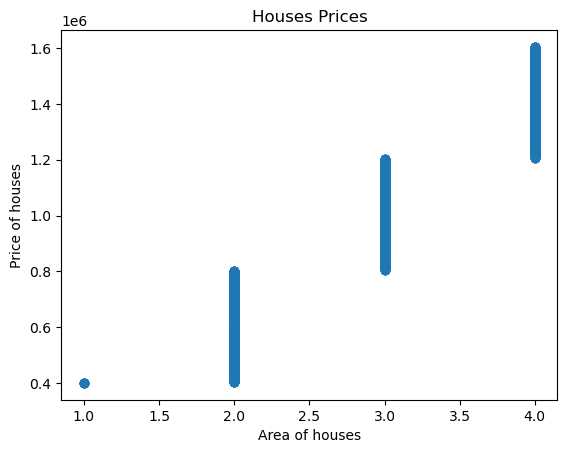

In [9]:
plt.scatter(df['Rooms'], df['price'])
plt.xlabel("Area of houses")
plt.ylabel("Price of houses")
plt.title("Houses Prices")
plt.show()

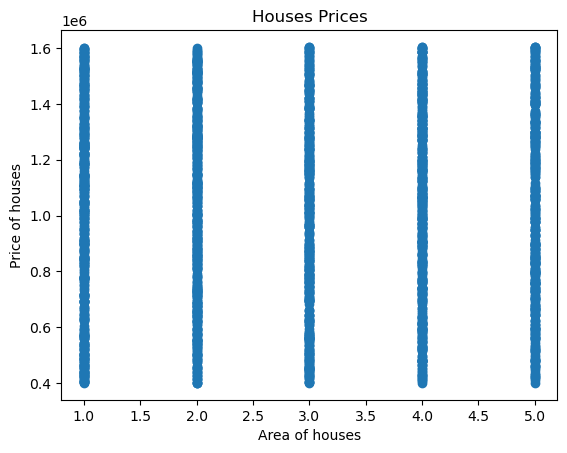

In [10]:
plt.scatter(df['floor'], df['price'])
plt.xlabel("Area of houses")
plt.ylabel("Price of houses")
plt.title("Houses Prices")
plt.show()

* EDA Summary

1. We are dealing with **clean data**, so don't worry.

# Prepare your Data

* Extract the feature and the target

In [11]:
features =['House Area', 'Rooms', 'floor']
target = ['price']
X = df[features]
y = df[target]

* Normalize the feature

In [12]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [13]:
X = np.array(X)

In [14]:
X

array([[-0.3245633 , -0.02812839,  0.75496216],
       [ 0.39479131, -0.02812839,  0.04318049],
       [-1.2527628 , -1.25141418,  0.75496216],
       ...,
       [-0.73065058, -1.25141418, -0.66860117],
       [-0.48699822, -0.02812839, -1.38038284],
       [ 1.26497835,  1.19515739,  0.04318049]])

In [15]:
X = df.iloc[: , :-1].values
y = df.iloc[: , -1].values 

In [16]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

### Add a column of ones for the intercept term

In [17]:
X = np.column_stack((np.ones(len(X)), X))

### Initialize parameters

#### Define 4 theta in one matrix (theta0 = 0, theta1 = 0, theta2 =0, theta3 = 0 ) 

In [18]:
theta = np.zeros(X.shape[1])

In [19]:
theta

array([0., 0., 0., 0.])

### Create a hypothesis function to Multiply theatas in Features to create predicted term in equation
* theat0 * 1 + theat1 * x1 + theat2 * x2 + theat3 * x3 

In [20]:
def hypothesis(X, theta):
    return np.dot(X, theta)

In [21]:
k=hypothesis(X,theta)

In [22]:
k.shape

(2044,)

# Split the Data

In [23]:
train_size = int(0.6 * len(X))
eval_size = int(0.20 * len(X))
test_size = len(X) - train_size - eval_size

* Shuffle the data

In [24]:
df = df.sample(frac=1, random_state=42)

In [25]:
# Shuffle the data
df = df.sample(frac=1, random_state=42)
# Split the data
x_train = X[:train_size]
y_train = y[:train_size]

x_eval = X[train_size:train_size+eval_size]
y_eval = y[train_size:train_size+eval_size]

x_test = X[train_size+eval_size:]
y_test = y[train_size+eval_size:]

In [26]:
x_train = X[:train_size]
print(x_train.shape)

(1226, 4)


In [27]:
y_test.shape

(410,)

In [28]:
y_eval.shape

(408,)

# Write Cost & GD Functions

###  Cost Function To Calculate Root Mean Squared Error (RMSE)

In [29]:
# Define the cost function (root mean squared error)
def cost_function(X, y, theta):
    m = len(y)
    return np.sqrt((1 / (2 * m)) * np.sum((hypothesis(X, theta) - y) ** 2)) 

### Define Gradient Decent Function

In [30]:
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    costs = []
    #thetas=[]

    for _ in range(epochs):
        error = hypothesis(X, theta) - y
        gradient = (2 / m) * np.dot(X.T, error)
        theta -= alpha * gradient
        costs.append(cost_function(X, y, theta))
        #print(theta)

    return theta, costs

### Calculate the Final Values of thetas

In [31]:
# Set hyperparameters
learning_rate = 0.01
epochs = 200

# Run gradient descent
theta, costs = gradient_descent(x_train, y_train, theta, learning_rate, epochs)

# Print the learned parameters
print("Learned parameters:", theta)

Learned parameters: [994697.98183191 204911.49389896 139408.19183983   4336.9183575 ]


### Drawing the values of cost Function  after each Iteration 

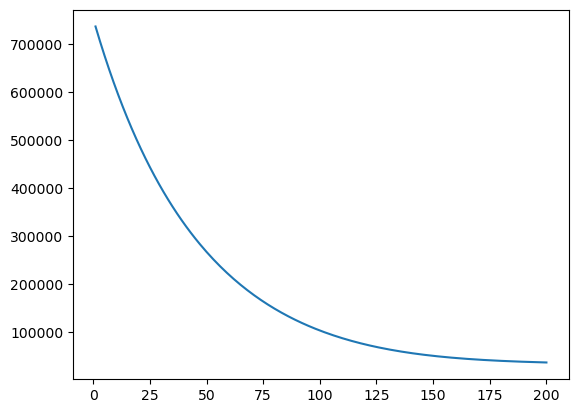

In [32]:
plt.plot(range(1,epochs+1),costs)

In [33]:
print("Print the final value of RMSE Based on Trianed Data: ",costs[-1] )

Print the final value of RMSE Based on Trianed Data:  35988.57661874114


In [35]:
print("Value of Cost Function From Testing Data: ", cost_function(x_test, y_test,theta))

Value of Cost Function From Testing Data:  37697.13602655307


In [36]:
print("Value of Cost Function From Testing Data: ", cost_function(x_test, y_test,theta))

37697.13602655307

In [37]:
print("Value of Cost Function From evalutiong Data: ", cost_function(x_eval, y_eval,theta))

Value of Cost Function From evalutiong Data:  37232.486230253235


##### Calculate values y_predict Fram Testing Data


In [40]:
y_predict = hypothesis(x_test, theta)

###  Evaluate the model on the evaluation set

In [41]:
Evalute_predict = np.dot(x_eval, theta)
eval_errors = Evalute_predict - y_eval
rmse_eval = np.sqrt(np.mean(eval_errors**2))

In [42]:
print("RMSE on the evaluation set:", rmse_eval )

RMSE on the evaluation set: 52654.68698769364


### Evaluate the model on the test set

In [43]:
test_predict = np.dot(x_test, theta)
test_errors = test_predict - y_test
rmse_test = np.sqrt(np.mean(test_errors**2))

In [44]:
print("RMSE on the test set:", rmse_test)

RMSE on the test set: 53311.80103137476


# -------------------------** Thanks **-------------------------